In [10]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd
from sklearn.model_selection import train_test_split

data = pd.read_csv('C:\\Users\\Rithi\\Downloads\\preprocessedHeartAttack_data.csv')
X = data[['Age', 'Sex', 'Cholesterol', 'Heart Rate', 'Diabetes', 'Family History', 'Smoking', 'Obesity',
          'Alcohol Consumption', 'Exercise Hours Per Week', 'Diet', 'Previous Heart Problems', 'Medication Use',
          'Stress Level', 'Sedentary Hours Per Day', 'BMI', 'Triglycerides', 'Physical Activity Days Per Week',
          'Sleep Hours Per Day', 'Systolic', 'Diastolic']]
y = data['Heart Attack Risk']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)


gb_classifier.fit(X_train, y_train)


y_pred_gb = gb_classifier.predict(X_test)

# Calculate accuracy
class_gb = classification_report(y_test, y_pred_gb)
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print("Gradiant Boosting Classifier Accuracy:", accuracy_gb)
print("\nGradiant Boosting Classifier Classification Report:\n", class_gb)

Gradiant Boosting Classifier Accuracy: 0.6337010270064664

Gradiant Boosting Classifier Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.98      0.77      1691
           1       0.22      0.01      0.02       938

    accuracy                           0.63      2629
   macro avg       0.43      0.49      0.40      2629
weighted avg       0.49      0.63      0.51      2629



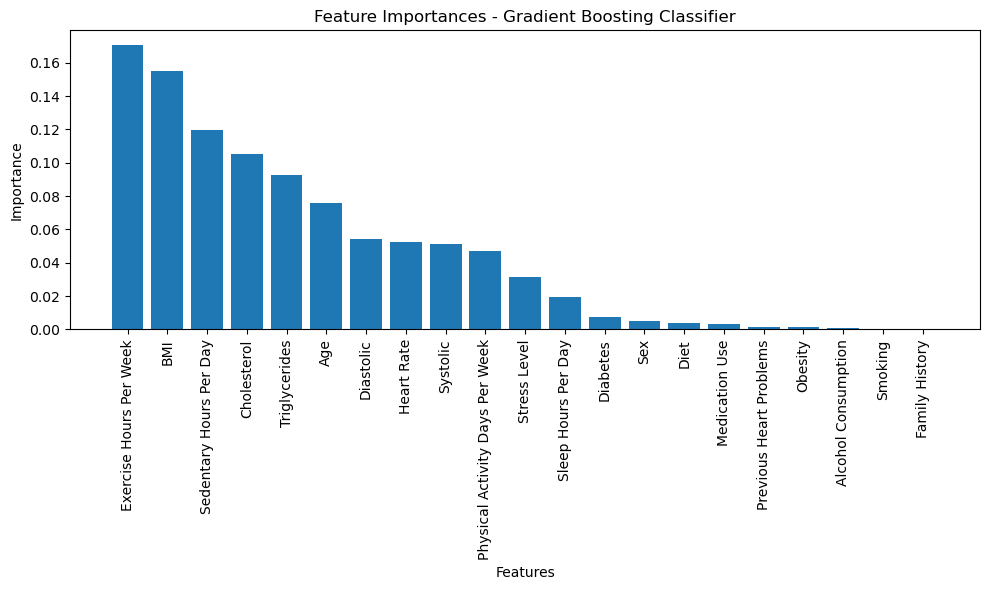

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importances from the trained model
feature_importances = gb_classifier.feature_importances_

# Get feature names
feature_names = X.columns

# Sort feature importances in descending order
indices = np.argsort(feature_importances)[::-1]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances - Gradient Boosting Classifier")
plt.bar(range(X.shape[1]), feature_importances[indices], align="center")
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()


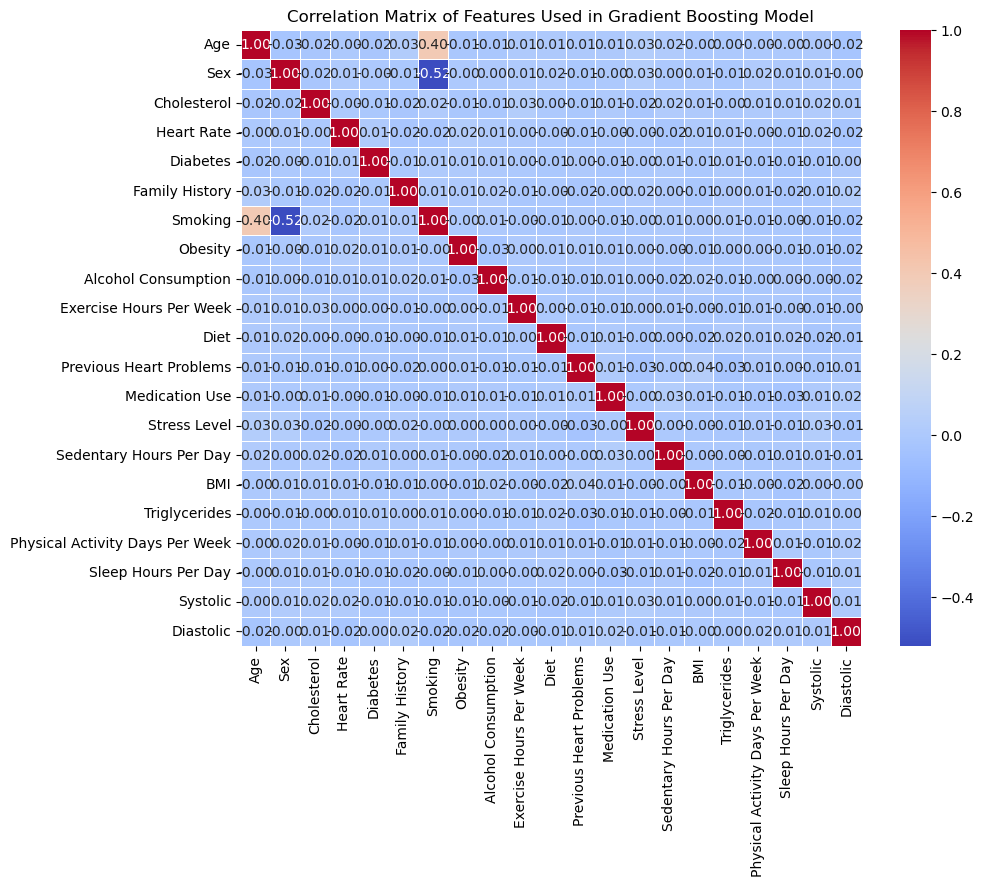

In [11]:
import seaborn as sns


gb_features = X_train.columns


correlation_matrix = X_train[gb_features].corr()


plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Features Used in Gradient Boosting Model')
plt.show()
